In [1]:
!pwd

/media/atem/Data/HSE_videos/4_DLA/hw_2_SeppechSep/git_speech_separation/src/notebooks


In [2]:
%cd ../..

/media/atem/Data/HSE_videos/4_DLA/hw_2_SeppechSep/git_speech_separation


In [3]:
import random

In [4]:
%load_ext autoreload
%autoreload 2

## Test Dataset

In [5]:
from omegaconf import OmegaConf
from hydra.utils import instantiate
from hydra import initialize, compose

with initialize(config_path="../configs", version_base=None):
    cfg = compose(config_name="baseline.yaml")
    dataset = instantiate(cfg.datasets.train, reindex=False, video_dir="/home/atem/HSE_videos/4_DLA/hw_2_SeppechSep/dla_dataset/mouths")

In [6]:
import random
import torch
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd

def plot_spec_and_phase(magnitude, phase, title_prefix=""):
    """Визуализация спектрограммы и фазы рядом"""
    mag = magnitude.squeeze().cpu().numpy()
    phs = phase.squeeze().cpu().numpy()

    fig, axes = plt.subplots(1, 2, figsize=(10, 3))
    im0 = axes[0].imshow(20 * np.log10(mag + 1e-8), aspect='auto', origin='lower')
    axes[0].set_title(f"{title_prefix} Magnitude (dB)")
    plt.colorbar(im0, ax=axes[0], fraction=0.046, pad=0.04)

    im1 = axes[1].imshow(phs, aspect='auto', origin='lower', cmap='twilight')
    axes[1].set_title(f"{title_prefix} Phase")
    plt.colorbar(im1, ax=axes[1], fraction=0.046, pad=0.04)

    plt.tight_layout()
    plt.show()


def listen_samples(dataset, k=3, sample_rate=16000):
    """
    Случайно выбирает k примеров из датасета и показывает:
      - аудио original mix
      - аудио mix после аугментаций
      - спектрограмму и фазу mix
      - аудио source 1 + его спектр и фазу
      - аудио source 2 + его спектр и фазу
    """
    indices = random.sample(range(len(dataset)), k)
    print(f"🎧 Прослушиваем {k} случайных примеров: {indices}\n")

    for idx in indices:
        example = dataset[idx]

        mix_orig = example["audio_original"].squeeze().cpu()
        mix_aug = example["audio"].squeeze().cpu()
        mix_mag = example["spectrogram"].squeeze().cpu()
        mix_phase = example["phase"].squeeze().cpu()

        src1_dict = example["sources"][0]
        src2_dict = example["sources"][1]

        src1_audio = src1_dict[list(src1_dict.keys())[0]].squeeze().cpu()
        src1_mag = src1_dict[list(src1_dict.keys())[1]].squeeze().cpu()
        src1_phase = src1_dict[list(src1_dict.keys())[2]].squeeze().cpu()

        src2_audio = src2_dict[list(src2_dict.keys())[0]].squeeze().cpu()
        src2_mag = src2_dict[list(src2_dict.keys())[1]].squeeze().cpu()
        src2_phase = src2_dict[list(src2_dict.keys())[2]].squeeze().cpu()

        print(f"🔹 Sample #{idx}")

        # --- MIX ORIGINAL ---
        print("🎧 Original Mix:")
        display(ipd.Audio(mix_orig.numpy(), rate=sample_rate))

        # --- MIX AUGMENTED ---
        print("🎧 Augmented Mix:")
        display(ipd.Audio(mix_aug.numpy(), rate=sample_rate))

        print("📊 Mix Spectrogram & Phase:")
        plot_spec_and_phase(mix_mag, mix_phase, "Mix")

        # --- SOURCE 1 ---
        print("🎧 Source 1:")
        display(ipd.Audio(src1_audio.numpy(), rate=sample_rate))
        print("📊 Source 1 Spectrogram & Phase:")
        plot_spec_and_phase(src1_mag, src1_phase, "Source 1")

        # --- SOURCE 2 ---
        print("🎧 Source 2:")
        display(ipd.Audio(src2_audio.numpy(), rate=sample_rate))
        print("📊 Source 2 Spectrogram & Phase:")
        plot_spec_and_phase(src2_mag, src2_phase, "Source 2")

        print("-" * 100)


🎧 Прослушиваем 2 случайных примеров: [3937, 3026]

CENTER CROP : frames.shape : (50, 96, 96)
CENTER CROP : frames.shape : (50, 96, 96)
🔹 Sample #3937
🎧 Original Mix:


🎧 Augmented Mix:


📊 Mix Spectrogram & Phase:


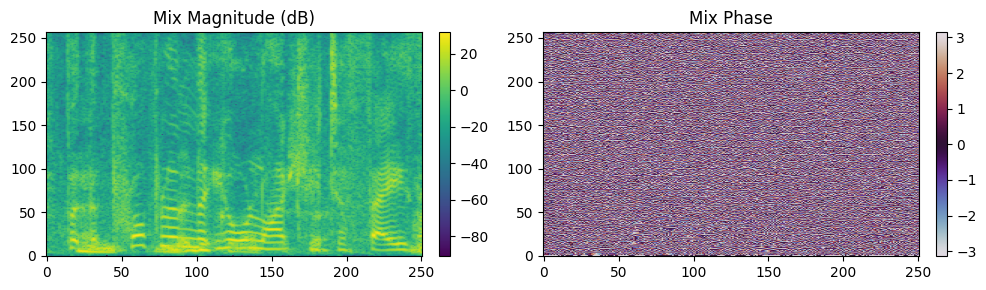

🎧 Source 1:


📊 Source 1 Spectrogram & Phase:


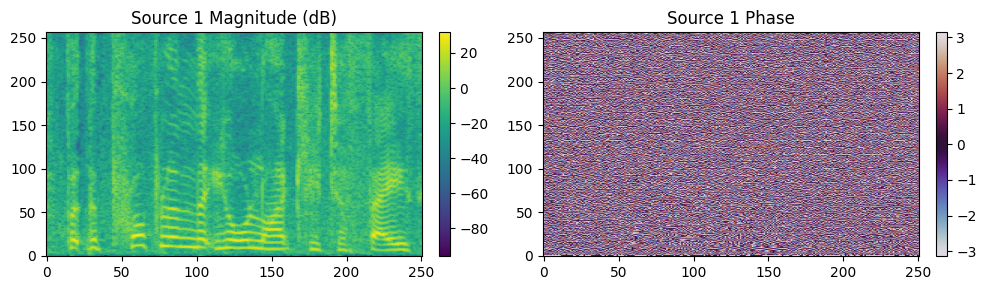

🎧 Source 2:


📊 Source 2 Spectrogram & Phase:


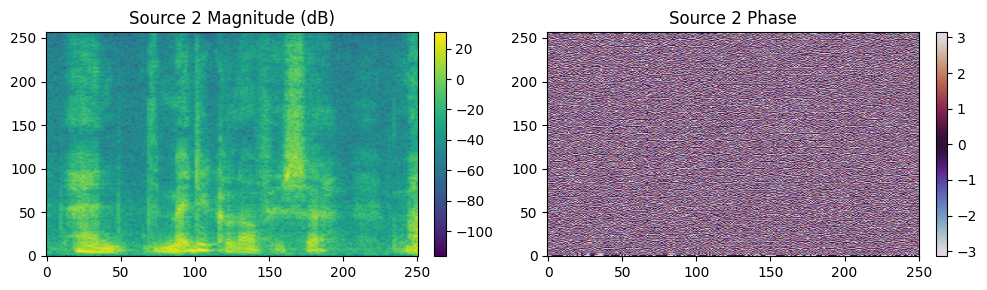

----------------------------------------------------------------------------------------------------
CENTER CROP : frames.shape : (50, 96, 96)
CENTER CROP : frames.shape : (50, 96, 96)
🔹 Sample #3026
🎧 Original Mix:


🎧 Augmented Mix:


📊 Mix Spectrogram & Phase:


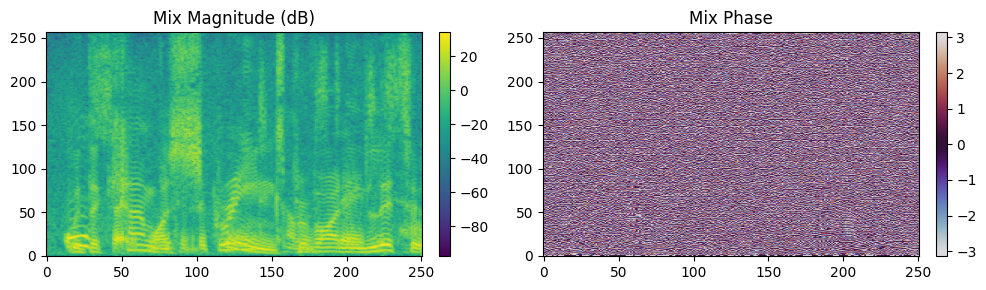

🎧 Source 1:


📊 Source 1 Spectrogram & Phase:


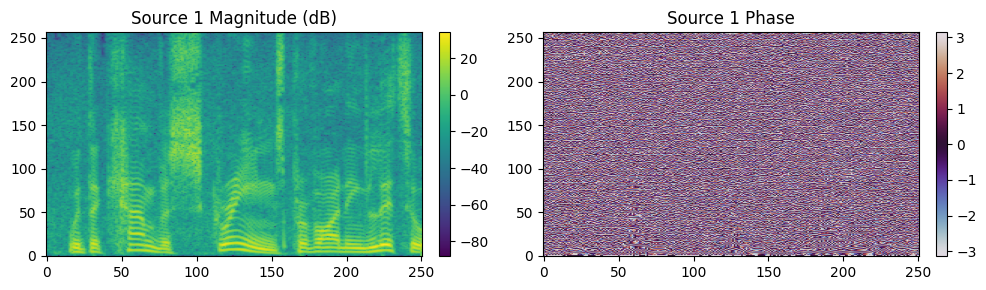

🎧 Source 2:


📊 Source 2 Spectrogram & Phase:


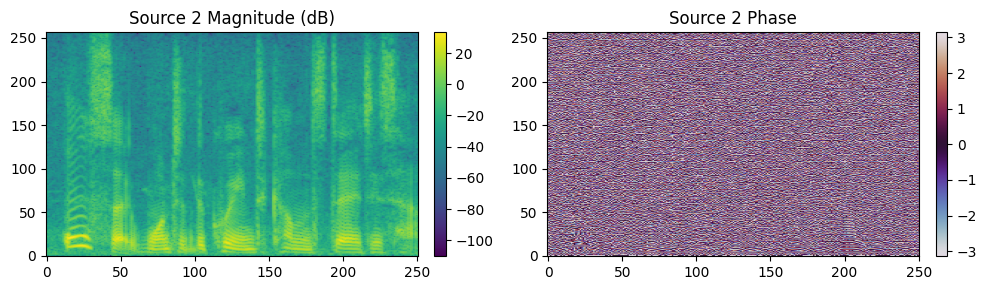

----------------------------------------------------------------------------------------------------


In [7]:
listen_samples(dataset, k=2, sample_rate=dataset.target_sr)

## Test vidoe .npz files

In [8]:
import numpy as np
npz = np.load("/media/atem/Data/HSE_videos/4_DLA/hw_2_SeppechSep/dla_dataset/mouths/00000083568.npz")

In [9]:
npz["data"].shape

(50, 96, 96)

## Test collate_fn

In [10]:
%load_ext autoreload
%autoreload 2

from src.datasets.collate import collate_fn

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
import random
k = 10
indices = random.sample(range(len(dataset)), k)
examples = [dataset[idx] for idx in indices]

CENTER CROP : frames.shape : (50, 96, 96)
CENTER CROP : frames.shape : (50, 96, 96)
CENTER CROP : frames.shape : (50, 96, 96)
CENTER CROP : frames.shape : (50, 96, 96)
CENTER CROP : frames.shape : (50, 96, 96)
CENTER CROP : frames.shape : (50, 96, 96)
CENTER CROP : frames.shape : (50, 96, 96)
CENTER CROP : frames.shape : (50, 96, 96)
CENTER CROP : frames.shape : (50, 96, 96)
CENTER CROP : frames.shape : (50, 96, 96)
CENTER CROP : frames.shape : (50, 96, 96)
CENTER CROP : frames.shape : (50, 96, 96)
CENTER CROP : frames.shape : (50, 96, 96)
CENTER CROP : frames.shape : (50, 96, 96)
CENTER CROP : frames.shape : (50, 96, 96)
CENTER CROP : frames.shape : (50, 96, 96)
CENTER CROP : frames.shape : (50, 96, 96)
CENTER CROP : frames.shape : (50, 96, 96)
CENTER CROP : frames.shape : (50, 96, 96)
CENTER CROP : frames.shape : (50, 96, 96)


In [12]:
len(examples)

10

In [13]:
examples[0]["sources"][1]["video"].shape

(50, 88, 88)

In [14]:
examples[0]["audio"].shape, examples[1]["audio"].shape

(torch.Size([1, 32000]), torch.Size([1, 32000]))

In [15]:
batch = collate_fn(examples)

In [16]:
batch.keys()

dict_keys(['spectrogram', 'phase', 'spectrogram_length', 'audio', 'video', 'audio_lengths', 'sources', 'audio_original', 'audio_path', 'audio_length'])

In [17]:
batch['audio_path']

['/media/atem/Data/HSE_videos/4_DLA/hw_2_SeppechSep/dla_dataset/audio/val/mix/00122808497_00001827909.wav',
 '/media/atem/Data/HSE_videos/4_DLA/hw_2_SeppechSep/dla_dataset/audio/val/mix/00903613074_00799633262.wav',
 '/media/atem/Data/HSE_videos/4_DLA/hw_2_SeppechSep/dla_dataset/audio/val/mix/00682464117_00668290812.wav',
 '/media/atem/Data/HSE_videos/4_DLA/hw_2_SeppechSep/dla_dataset/audio/val/mix/00621126188_00229415147.wav',
 '/media/atem/Data/HSE_videos/4_DLA/hw_2_SeppechSep/dla_dataset/audio/val/mix/00026463184_00411021247.wav',
 '/media/atem/Data/HSE_videos/4_DLA/hw_2_SeppechSep/dla_dataset/audio/val/mix/00825735911_00369455032.wav',
 '/media/atem/Data/HSE_videos/4_DLA/hw_2_SeppechSep/dla_dataset/audio/val/mix/00121805210_00970085165.wav',
 '/media/atem/Data/HSE_videos/4_DLA/hw_2_SeppechSep/dla_dataset/audio/val/mix/00786543994_00544113030.wav',
 '/media/atem/Data/HSE_videos/4_DLA/hw_2_SeppechSep/dla_dataset/audio/val/mix/00455159909_00907785506.wav',
 '/media/atem/Data/HSE_video

In [18]:
batch['spectrogram'].shape, batch['spectrogram_length'], batch['audio_length']

(torch.Size([10, 257, 251]),
 tensor([251, 251, 251, 251, 251, 251, 251, 251, 251, 251]),
 32000)

In [19]:
batch['audio'].shape, batch['audio_length']

(torch.Size([10, 32000]), 32000)

In [20]:
len(batch['sources'])

2

In [21]:
torch.stack([batch['spectrogram'], batch['phase']], dim=1).shape

torch.Size([10, 2, 257, 251])

In [22]:
batch['sources'][0].keys()

dict_keys(['audio', 'spectrogram', 'phase'])

In [23]:
batch['sources'][0]["spectrogram"].shape

torch.Size([10, 257, 251])

In [24]:
batch['sources'][0]["audio"].device

device(type='cpu')

## Test Batch to Device

In [25]:
import torch
def move_batch_to_device(device, batch):
    """
    Move all necessary tensors to the device.

    Args:
        batch (dict): dict-based batch containing the data from
            the dataloader.
    Returns:
        batch (dict): dict-based batch containing the data from
            the dataloader with some of the tensors on the device.
    """
    for tensor_for_device in ["spectrogram", "phase", "sources", "audio", "audio_length", "video"]:
        if isinstance(batch[tensor_for_device], torch.Tensor):
            batch[tensor_for_device] = batch[tensor_for_device].to(device)
        if isinstance(batch[tensor_for_device], list):
            for item in batch[tensor_for_device]:
                if isinstance(item, torch.Tensor):
                    item = item.to(device)
                if isinstance(item, dict):
                    for k, v in item.items():
                        item[k] = v.to(device)
    return batch

In [26]:
device = 'cuda'

In [27]:
batch = move_batch_to_device(device, batch)

In [28]:
batch["sources"][0]["spectrogram"].device

device(type='cuda', index=0)

In [29]:
batch["video"].device

device(type='cuda', index=0)

## Test Baseline Model

In [30]:
from src.model import BaselineModel

In [31]:
baseline_model = BaselineModel(n_feats=257)
baseline_model.to(device)

BaselineModel(
  (source_nets): ModuleList(
    (0-1): 2 x BaselineModelBlock(
      (net_spec): Sequential(
        (0): Linear(in_features=257, out_features=512, bias=True)
        (1): ReLU()
        (2): Linear(in_features=512, out_features=257, bias=True)
      )
      (net_phase): Sequential(
        (0): Linear(in_features=257, out_features=512, bias=True)
        (1): ReLU()
        (2): Linear(in_features=512, out_features=257, bias=True)
      )
    )
  )
)

In [32]:
model_out = baseline_model(**batch)
batch.update(model_out)


In [33]:
batch.keys()

dict_keys(['spectrogram', 'phase', 'spectrogram_length', 'audio', 'video', 'audio_lengths', 'sources', 'audio_original', 'audio_path', 'audio_length', 'preds'])

In [34]:
batch["spectrogram"].shape

torch.Size([10, 257, 251])

## Test Loss

In [35]:
from src.loss import DTTNetLoss
spec_loss = DTTNetLoss()

In [36]:
loss_spectrum = spec_loss(
    audio_pred = batch["preds"][0]["audio"], 
    spectrogram_pred = batch["preds"][0]["spectrogram"], 
    phase_pred = batch["preds"][0]["phase"],
    audio_true = batch["sources"][0]["audio"], 
    spectrogram_true = batch["sources"][0]["spectrogram"], 
    phase_true = batch["sources"][0]["phase"], 
)

In [37]:
loss_spectrum

tensor([3.3368, 3.0836, 2.7441, 2.9517, 2.6482, 2.6295, 3.1131, 2.8035, 2.2357,
        2.5429], device='cuda:0', grad_fn=<AddBackward0>)

## Test PIT Loss Wrapper

In [38]:
# from src.loss.pit_loss_wrapper import PITLossWrapper
with initialize(config_path="../configs", version_base=None):
    cfg = compose(config_name="baseline.yaml")
    pit_loss = instantiate(cfg.loss_function)

In [39]:
loss = pit_loss(**batch)
loss

{'loss': tensor(5.5077, device='cuda:0', grad_fn=<MeanBackward0>),
 'batch_permuts': tensor([[0, 1],
         [1, 0],
         [1, 0],
         [0, 1],
         [1, 0],
         [1, 0],
         [0, 1],
         [0, 1],
         [0, 1],
         [1, 0]], device='cuda:0')}

In [40]:
batch.update(loss)

In [41]:
batch.keys()

dict_keys(['spectrogram', 'phase', 'spectrogram_length', 'audio', 'video', 'audio_lengths', 'sources', 'audio_original', 'audio_path', 'audio_length', 'preds', 'loss', 'batch_permuts'])

In [42]:
batch["preds"][0]["audio"].shape

torch.Size([10, 32000])

## Test Metrics

In [43]:
from src.metrics.si_snr_i_PIT_wrapper import SiSnrIPITWrapper
from src.metrics.si_snr_i import SiSnrI
from src.metrics.si_snr import SiSnr

In [44]:
si_snr = SiSnr()

In [45]:
pred_audio_batch = batch['preds'][0]['audio']
true_audio_batch = batch['sources'][0]['audio']
si_snr(pred_audio_batch, true_audio_batch)

tensor([-41.8296, -30.3545, -15.8754, -16.1982, -33.0565, -32.2769, -27.2809,
        -23.8511, -20.2964, -19.8655], device='cuda:0', grad_fn=<MulBackward0>)

In [46]:
metric_wrapper = SiSnrIPITWrapper()

In [47]:
metric_wrapper(**batch)

tensor(-57.2113)

# RTFS Net testing

## Npz files test

In [48]:
import numpy as np
npz_path = "/home/atem/HSE_videos/4_DLA/hw_2_SeppechSep/dla_dataset/mouths/00000033394.npz"
npz_data = np.load(npz_path)["data"]

In [49]:
type(npz_data), npz_data.dtype

(numpy.ndarray, dtype('uint8'))

In [50]:
# import matplotlib.pyplot as plt
# from IPython.display import clear_output
# from time import sleep

# for i in range(len(npz_data)):
#     plt.imshow(npz_data[i], cmap='gray')
#     plt.title(f"Frame {i}")
#     plt.axis('off')
#     plt.show()
#     sleep(0.5)
#     clear_output()

## Lipsread testing

In [51]:
from src.model.RTFSNet.modules.video_encoder import VideoEncoderModule
video_encoder = VideoEncoderModule(load_weights_path="/media/atem/Data/HSE_videos/4_DLA/hw_2_SeppechSep/git_speech_separation/src/model/lipreading/lrw_snv1x_dsmstcn3x.pth").to(device)

In [52]:
B, C, T, H, W = batch["video"].shape
batch["video"].shape

torch.Size([10, 2, 50, 88, 88])

In [53]:
reshaped_batch = batch["video"].reshape(B * C, 1, T, H, W)
reshaped_batch.shape, reshaped_batch.dtype

(torch.Size([20, 1, 50, 88, 88]), torch.float32)

In [54]:
(reshaped_batch[1, 0, ...] == batch["video"][0, 1, ...]).all()

tensor(True, device='cuda:0')

In [55]:
video_batch = batch["video"][0:2, ...]

In [56]:
video_batch.shape

torch.Size([2, 2, 50, 88, 88])

In [57]:
video_encoder_out = video_encoder(video_batch)

In [58]:
video_encoder_out.shape

torch.Size([2, 2, 50, 1024])

## Modules

### AudioEncoderModule

In [82]:
from src.model.RTFSNet.modules.audio_encoder import AudioEncoderModule
audio_encoder = AudioEncoderModule(out_channels=32).to(device)
out = audio_encoder(batch["spectrogram"], batch["phase"])

In [83]:
out.shape

torch.Size([10, 32, 257, 251])

### RTFS - Module

#### CompressionUnit

In [86]:
from src.model.RTFSNet.modules.blocks.RTFS_block.rtfs_block import CompressionUnit
comp_unit = CompressionUnit(32, 4, 3).to(device)

out_compression = comp_unit(out)

In [ ]:
c.shape

torch.Size([10, 4, 64, 62])

#### Unfold

In [88]:
import matplotlib.pyplot as plt

In [107]:
# out_compression shape is [B, D, F, T]
# first step - unfold freqs
unfolded_out = torch.nn.functional.unfold(out_compression, (8,1))
unfolded_out.shape

torch.Size([10, 32, 3534])

In [272]:
x = torch.arange(2 * 2 * 12 * 5).reshape(2, 2, 12, 5).float()
x

tensor([[[[  0.,   1.,   2.,   3.,   4.],
          [  5.,   6.,   7.,   8.,   9.],
          [ 10.,  11.,  12.,  13.,  14.],
          [ 15.,  16.,  17.,  18.,  19.],
          [ 20.,  21.,  22.,  23.,  24.],
          [ 25.,  26.,  27.,  28.,  29.],
          [ 30.,  31.,  32.,  33.,  34.],
          [ 35.,  36.,  37.,  38.,  39.],
          [ 40.,  41.,  42.,  43.,  44.],
          [ 45.,  46.,  47.,  48.,  49.],
          [ 50.,  51.,  52.,  53.,  54.],
          [ 55.,  56.,  57.,  58.,  59.]],

         [[ 60.,  61.,  62.,  63.,  64.],
          [ 65.,  66.,  67.,  68.,  69.],
          [ 70.,  71.,  72.,  73.,  74.],
          [ 75.,  76.,  77.,  78.,  79.],
          [ 80.,  81.,  82.,  83.,  84.],
          [ 85.,  86.,  87.,  88.,  89.],
          [ 90.,  91.,  92.,  93.,  94.],
          [ 95.,  96.,  97.,  98.,  99.],
          [100., 101., 102., 103., 104.],
          [105., 106., 107., 108., 109.],
          [110., 111., 112., 113., 114.],
          [115., 116., 117., 118

In [273]:
x.shape

torch.Size([2, 2, 12, 5])

In [274]:
x_unfolded = torch.nn.functional.unfold(x, (3,1))
x_unfolded

tensor([[[  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,  45.,  46.,  47.,
           48.,  49.],
         [  5.,   6.,   7.,   8.,   9.,  10.,  11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,
           53.,  54.],
         [ 10.,  11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,  56.,  57.,
           58.,  59.],
         [ 60.,  61.,  62.,  63.,  64

In [275]:
x_unfolded.shape # [B x D * 3 x T = 5 * F' = 10]

torch.Size([2, 6, 50])

In [277]:
x_unfolded.reshape(2, 6, 10, 5).permute(0,3,2,1)

tensor([[[[  0.,   5.,  10.,  60.,  65.,  70.],
          [  5.,  10.,  15.,  65.,  70.,  75.],
          [ 10.,  15.,  20.,  70.,  75.,  80.],
          [ 15.,  20.,  25.,  75.,  80.,  85.],
          [ 20.,  25.,  30.,  80.,  85.,  90.],
          [ 25.,  30.,  35.,  85.,  90.,  95.],
          [ 30.,  35.,  40.,  90.,  95., 100.],
          [ 35.,  40.,  45.,  95., 100., 105.],
          [ 40.,  45.,  50., 100., 105., 110.],
          [ 45.,  50.,  55., 105., 110., 115.]],

         [[  1.,   6.,  11.,  61.,  66.,  71.],
          [  6.,  11.,  16.,  66.,  71.,  76.],
          [ 11.,  16.,  21.,  71.,  76.,  81.],
          [ 16.,  21.,  26.,  76.,  81.,  86.],
          [ 21.,  26.,  31.,  81.,  86.,  91.],
          [ 26.,  31.,  36.,  86.,  91.,  96.],
          [ 31.,  36.,  41.,  91.,  96., 101.],
          [ 36.,  41.,  46.,  96., 101., 106.],
          [ 41.,  46.,  51., 101., 106., 111.],
          [ 46.,  51.,  56., 106., 111., 116.]],

         [[  2.,   7.,  12.,  62.,  

#### OnePath

In [278]:
x.shape

torch.Size([2, 2, 12, 5])

In [279]:
from src.model.RTFSNet.modules.blocks.RTFS_block.rtfs_block import OnePathUnit
dual_path_unit = OnePathUnit(2, 3).to(device)
out_dual_path = dual_path_unit(x.to(device))

In [280]:
out_dual_path.shape

torch.Size([2, 2, 12, 5])

#### TF Attention

In [282]:
from src.model.RTFSNet.modules.blocks.RTFS_block.rtfs_block import TFAttention
tf_attention = TFAttention(2, 12, 2).cuda()
res = tf_attention(out_dual_path)
res.shape

torch.Size([2, 6, 12, 5])
torch.Size([3, 2, 5, 24])
torch.Size([2, 5, 24])
torch.Size([2, 2, 12, 5])


torch.Size([2, 2, 12, 5])

In [300]:
n_batch = 2
n_channels = 8
n_heads = 2
E_dim = 2
V_dim = n_channels // n_heads
F = 12
T = 5
x = torch.arange(n_batch * n_channels * F * T).reshape(n_batch, n_channels, F, T).float().cuda()


x.shape

torch.Size([2, 8, 12, 5])

In [301]:
conv = torch.nn.Conv2d(n_channels, (E_dim * 2 + V_dim) * n_heads, 1).cuda()

In [302]:
conv_out = conv(x)
conv_out.shape

torch.Size([2, 16, 12, 5])

In [303]:
q = conv_out[:, : E_dim * n_heads , ...].unflatten(1, (n_heads, -1))
k = conv_out[:, E_dim * n_heads : 2 * E_dim * n_heads, ...].unflatten(1, (n_heads, -1))
v = conv_out[:, 2 * E_dim * n_heads : , ...].unflatten(1, (n_heads, -1))

q.shape, k.shape, v.shape

(torch.Size([2, 2, 2, 12, 5]),
 torch.Size([2, 2, 2, 12, 5]),
 torch.Size([2, 2, 4, 12, 5]))

In [315]:
# Layer Norm
norm_q = torch.nn.LayerNorm(E_dim * F).to(device)
prelu = torch.nn.PReLU().to(device)
norm_k = torch.nn.LayerNorm(E_dim * F).to(device)
norm_v = torch.nn.LayerNorm(V_dim * F).to(device)

In [325]:
q_new = norm_q(prelu(q.permute(0,1,-1,2,3).flatten(0,2).flatten(1,2)))\
    .unflatten(0, (n_batch, n_heads, T))
k_new = norm_k(prelu(k.permute(0,1,-1,2,3).flatten(0,2).flatten(1,2)))\
    .unflatten(0, (n_batch, n_heads, T))
v_new = norm_v(prelu(v.permute(0,1,-1,2,3).flatten(0,2).flatten(1,2)))\
    .unflatten(0, (n_batch, n_heads, T))

In [326]:
q_new.shape

torch.Size([2, 2, 5, 24])

In [332]:
attn = torch.nn.functional.softmax(torch.matmul(q_new, k_new.transpose(-1,-2)) / (E_dim * F) ** (1/2), dim=-1)
attn.shape

torch.Size([2, 2, 5, 5])

In [344]:
res = torch.matmul(attn, v_new)
res.shape

torch.Size([2, 2, 5, 48])

In [340]:
res = res.unflatten(-1, (V_dim, F)).permute(0, 4, 2, 3, 1).flatten(-2, -1)
res.shape

torch.Size([2, 12, 5, 8])

In [262]:
attn_res, _ = attn(out_dual_path_conv[0],
                out_dual_path_conv[1],
                out_dual_path_conv[2],
                )

In [264]:
attn_res.shape

torch.Size([1, 5, 24])

In [265]:
res = attn_res.unflatten(-1, (F, in_channels)).permute(0, -1, 1, 2)
res.shape

torch.Size([1, 2, 5, 12])